In [2]:

import os
import pickle
import glob
import tqdm

input_dir ="/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_25GeV_1" 
output_dir = "/mnt/c/Users/hnayak/Documents/25GeV/small_PKL_proton_25GeV_1" 

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Get all pickle files in sorted order
pkl_files = sorted(glob.glob(os.path.join(input_dir, "*.pkl")))
# start_index = 93
# pkl_files = pkl_files[start_index:]
print(f"Total files to process: {(pkl_files)}")
# Initialize the counter for sequential numbering
global_counter = 1

for idx, pkl_file in tqdm.tqdm(enumerate(pkl_files, start=1 ), total=len(pkl_files)):
    # print(f"Processing file {idx}: {pkl_file}")
    with open(pkl_file, "rb") as f:
        dataframes = pickle.load(f)  # Load the list of 1000 DataFrames

    # Save each DataFrame to a Parquet file
    for df in dataframes:
        sproton_filename = os.path.join(output_dir, f"sproton{global_counter}.pkl")
    
        df.to_pickle(sproton_filename)
        global_counter += 1


print("Splitting and saving completed successfully!")


Total files to process: ['/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_25GeV_1/proton1.pkl', '/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_25GeV_1/proton10.pkl', '/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_25GeV_1/proton100.pkl', '/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_25GeV_1/proton11.pkl', '/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_25GeV_1/proton12.pkl', '/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_25GeV_1/proton13.pkl', '/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_25GeV_1/proton14.pkl', '/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_25GeV_1/proton15.pkl', '/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_25GeV_1/proton16.pkl', '/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_25GeV_1/proton17.pkl', '/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_25GeV_1/

100%|██████████| 100/100 [07:33<00:00,  4.53s/it]

Splitting and saving completed successfully!


In [12]:
import os
import glob
import re

input_dir = "/mnt/c/Users/hnayak/OneDrive - University of Tennessee/PKL_proton_100GeV_100"
output_dir = "/mnt/c/Users/hnayak/Documents/100GeV/small_PKL_proton_100GeV_100"

# Get all .pkl files
pkl_files = glob.glob(os.path.join(input_dir, "*.pkl"))

# Sort files numerically by extracting the number
def extract_number(filename):
    match = re.search(r'(\d+)\.pkl$', os.path.basename(filename))
    return int(match.group(1)) if match else -1

pkl_files_sorted = sorted(pkl_files, key=extract_number)

# Determine how many full .pkl files were used to create 93000 output files
files_used = 93000 // 1000  # 93 full input .pkl files

# Used and remaining files
used_files = pkl_files_sorted[:files_used]
remaining_files = pkl_files_sorted[files_used:]

print(f"Total input .pkl files: {len(pkl_files_sorted)}")
print(f"Used files (up to sproton93000.pkl): {files_used}")
print("Used .pkl filenames:")
for f in used_files:
    print(" ", os.path.basename(f))

print("\nRemaining .pkl filenames:")
for f in remaining_files:
    print(" ", os.path.basename(f))


Total input .pkl files: 100
Used files (up to sproton93000.pkl): 93
Used .pkl filenames:
  proton1.pkl
  proton2.pkl
  proton3.pkl
  proton4.pkl
  proton5.pkl
  proton6.pkl
  proton7.pkl
  proton8.pkl
  proton9.pkl
  proton10.pkl
  proton11.pkl
  proton12.pkl
  proton13.pkl
  proton14.pkl
  proton15.pkl
  proton16.pkl
  proton17.pkl
  proton18.pkl
  proton19.pkl
  proton20.pkl
  proton21.pkl
  proton22.pkl
  proton23.pkl
  proton24.pkl
  proton25.pkl
  proton26.pkl
  proton27.pkl
  proton28.pkl
  proton29.pkl
  proton30.pkl
  proton31.pkl
  proton32.pkl
  proton33.pkl
  proton34.pkl
  proton35.pkl
  proton36.pkl
  proton37.pkl
  proton38.pkl
  proton39.pkl
  proton40.pkl
  proton41.pkl
  proton42.pkl
  proton43.pkl
  proton44.pkl
  proton45.pkl
  proton46.pkl
  proton47.pkl
  proton48.pkl
  proton49.pkl
  proton50.pkl
  proton51.pkl
  proton52.pkl
  proton53.pkl
  proton54.pkl
  proton55.pkl
  proton56.pkl
  proton57.pkl
  proton58.pkl
  proton59.pkl
  proton60.pkl
  proton61.pkl
  pro

In [2]:
import os
import pickle
import glob
import tqdm
import multiprocessing as mp
from functools import partial

# === Config ===
input_dir = "/mnt/c/Users/hnayak/Documents/PKL_proton_50GeV_50"
output_dir = "./small_PKL_proton_50GeV_50"
os.makedirs(output_dir, exist_ok=True)

pkl_files = sorted(glob.glob(os.path.join(input_dir, "*.pkl")))

# === Worker Function ===
def save_dataframe(df_with_index, output_dir):
    df, index = df_with_index
    filename = os.path.join(output_dir, f"sproton{index}.pkl")
    df.to_pickle(filename)

# === Parallel Processing ===
def process_file(index_offset, pkl_file):
    with open(pkl_file, "rb") as f:
        dataframes = pickle.load(f)

    # Pair each df with its global index
    return [(df, index_offset + i) for i, df in enumerate(dataframes, start=1)]

# === Main ===
if __name__ == "__main__":
    all_pairs = []
    print("Loading data from .pkl files...")

    # First, read all files and prepare (df, index) tuples
    index_offset = 1
    for pkl_file in tqdm.tqdm(pkl_files, desc="Reading files"):
        df_with_indices = process_file(index_offset, pkl_file)
        all_pairs.extend(df_with_indices)
        index_offset += len(df_with_indices)

    print(f"Saving {len(all_pairs)} DataFrames using multiprocessing...")

    with mp.Pool(mp.cpu_count()) as pool:
        pool.map(partial(save_dataframe, output_dir=output_dir), all_pairs)

    print("Parallel splitting and saving completed successfully!")


Loading data from .pkl files...


Reading files:   9%|▉         | 9/100 [00:51<08:38,  5.70s/it]


KeyboardInterrupt: 

In [18]:
import pickle
import gc

for i in range(40, 101):
    sample_file = f"/mnt/c/Users/hnayak/Documents/PKL_proton_100GeV_100/proton{i}.pkl"
    # print(f"Loading {sample_file}...")

    try:
        with open(sample_file, "rb") as f:
            dataframes = pickle.load(f)  # Attempt to load the file
        # print(f"Number of DataFrames in {sample_file}: {len(dataframes)}")
        del dataframes
        gc.collect()
    except Exception as e:
        print(f"Failed to load {sample_file}: {e}")
        continue


Failed to load /mnt/c/Users/hnayak/Documents/PKL_proton_100GeV_100/proton41.pkl: pickle data was truncated
Failed to load /mnt/c/Users/hnayak/Documents/PKL_proton_100GeV_100/proton71.pkl: pickle data was truncated


In [12]:
sample_file = "/mnt/c/Users/hnayak/Documents/PKL_proton_100GeV_100/proton16.pkl"
print(f"Loading {sample_file}...")
with open(sample_file, "rb") as f:
    dataframes = pickle.load(f)  # Load the list of 1000 DataFrames
# Force garbage collection
print(f"Number of DataFrames in {sample_file}: {len(dataframes)}")

Loading /mnt/c/Users/hnayak/Documents/PKL_proton_100GeV_100/proton16.pkl...


EOFError: Ran out of input

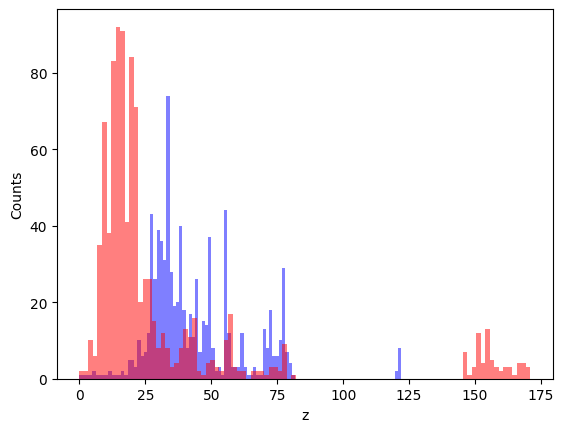

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
i=1011
f=f"/mnt/newdisk/2003_data_pkl/PKL_proton/small_proton/sproton{i}.pkl"
with open(f,'rb') as f:
    file=pickle.load(f)
f1=f"/mnt/newdisk/2003_data_pkl/PKL_pion/small_pion/spion{i}.pkl"
with open(f1,'rb') as f:
    file1=pickle.load(f)
file=file[file["total_energy"]>5]
file1=file1[file1["total_energy"]>5]
plt.Figure(figsize=(10, 6))
plt.hist(file["z"], bins=100, alpha=0.5, label="x",color='blue')
plt.hist(file1["z"], bins=100, alpha=0.5, label="y",color='red')
plt.xlabel("z")
plt.ylabel("Counts")
plt.show()

In [ ]:
#PKL_files(1000) to small pickle files
